In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)

In [5]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
le = LabelEncoder()

In [11]:
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\User

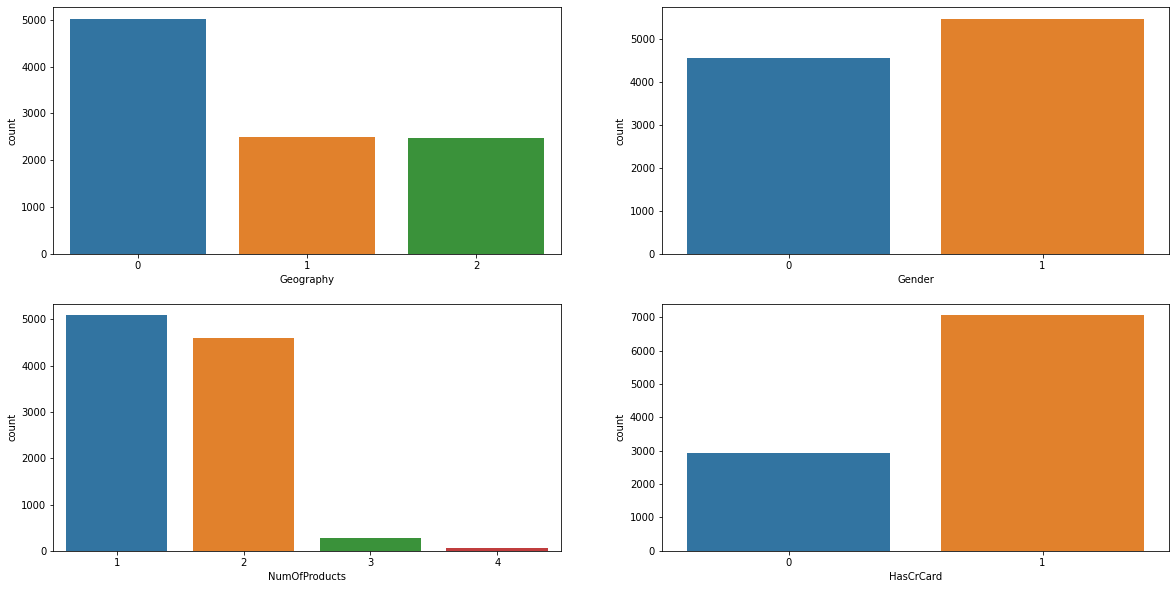

In [15]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax1.set_xlabel("Geography")
sns.countplot(df['Geography'])

ax2 = fig.add_subplot(222)
ax2.set_xlabel("Gender")
sns.countplot(df['Gender'])

ax3 = fig.add_subplot(223)
ax3.set_xlabel("NumOfProducts")
sns.countplot(df['NumOfProducts'])

ax4 = fig.add_subplot(224)
ax4.set_xlabel("HasCrCard")
sns.countplot(df['HasCrCard'])

plt.show()

C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

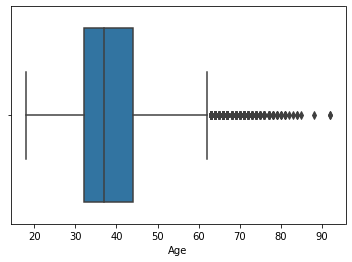

In [17]:
sns.boxplot(df['Age'])

In [19]:
df['Age']
df.drop(df[(df['Age']<=0) & (df['Age']>100)].index, inplace=True, axis=0)

In [20]:
df['Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

In [21]:
X = df.drop(['Exited'],axis=1)
X

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [23]:
Y = df['Exited']
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
model = keras.Sequential([
    keras.layers.Dense(units=25,activation='relu'),
    keras.layers.Dense(units=10,activation='relu'),
    keras.layers.Dense(units=1,activation='sigmoid')
])

In [26]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics='accuracy')

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

In [42]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956: 0s - l
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 

250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 80/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 81/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 82/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 83/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 84/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5065 - accuracy: 0.7956
Epoch 85/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 86/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 87/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 88/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 

In [43]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7990


[0.5018187761306763, 0.7990000247955322]

In [59]:
y_preds = model.predict(x_test)
y_preds
y_pred = []
for p in y_preds:
    if p>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1598
           1       0.00      0.00      0.00       402

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

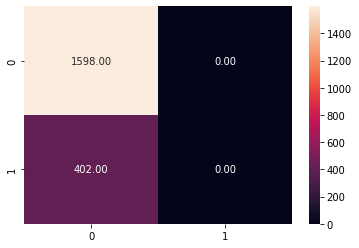

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="0.2f")

In [64]:
accuracy_score(y_test,y_pred) * 100


79.9